In [102]:
import pandas as pd
from sklearn.decomposition import PCA

# load data
streamer_df = pd.read_csv("twitchdata.csv")
streamer_df.index = streamer_df["Channel"]
streamer_df.drop(["Channel", "Partnered", "Mature", "Language"], axis=1, inplace=True)
streamer_df.head(10)

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Channel,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926


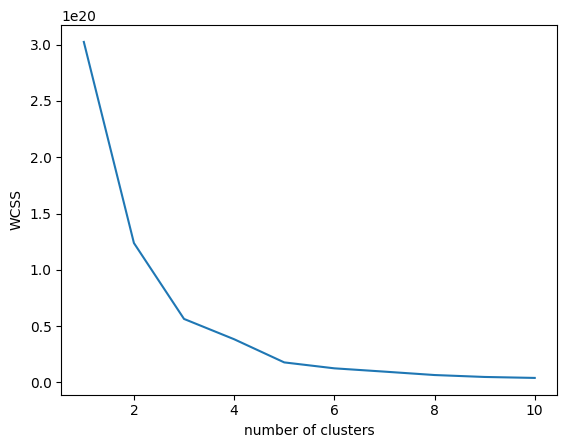

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

seed = 142195953 # my SSN
k_vals = range(1, 11)
wcss = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    kmeans.fit(streamer_df)
    wcss.append(kmeans.inertia_)

# Plot the SSD vs. k values
plt.plot(k_vals, wcss)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

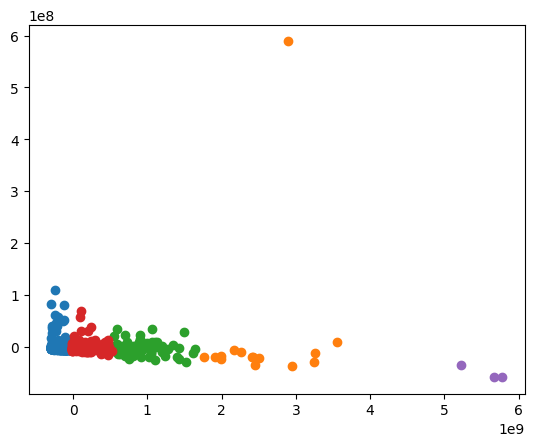

In [108]:
elbow_number = 5 # by looking at graph in previous cell, elbow_number seems to be 3

reduced = PCA(2).fit_transform(streamer_df)
model = KMeans(n_clusters=elbow_number, n_init="auto", random_state=seed)
model.fit(streamer_df)
labels = model.predict(streamer_df)
streamer_df["cluster"] = labels

for i in set(labels):
    filtered = reduced[labels == i]
    plt.scatter(filtered[:,0] , filtered[:,1])

plt.show()

In [109]:
streamer_df.head(10)


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,cluster
Channel,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,4
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,4
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,4
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,1
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,1
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,1
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,1
